In [1]:
import pandas as pd
import os
os.chdir("C:/VideoGameStackedChart")
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set_style()


In [2]:
raw_data=pd.read_csv("vgsales.csv")
raw_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
raw_data.dropna(subset=['Year'], inplace=True)
raw_data['Year'] = raw_data['Year'].astype(int)

In [4]:
raw_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df = raw_data[(raw_data['Year'] >= 1995) & (raw_data['Year'] <= 2016)]
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


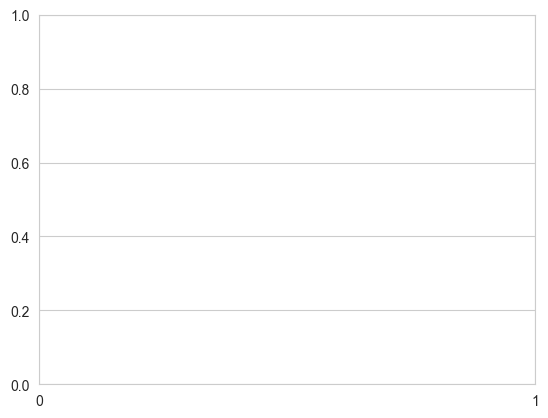

In [ ]:
top_platforms = df.groupby('Platform')['Global_Sales'].sum().nlargest(6).index
df_top = df[df['Platform'].isin(top_platforms)]

platform_sales = df_top.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack().fillna(0)


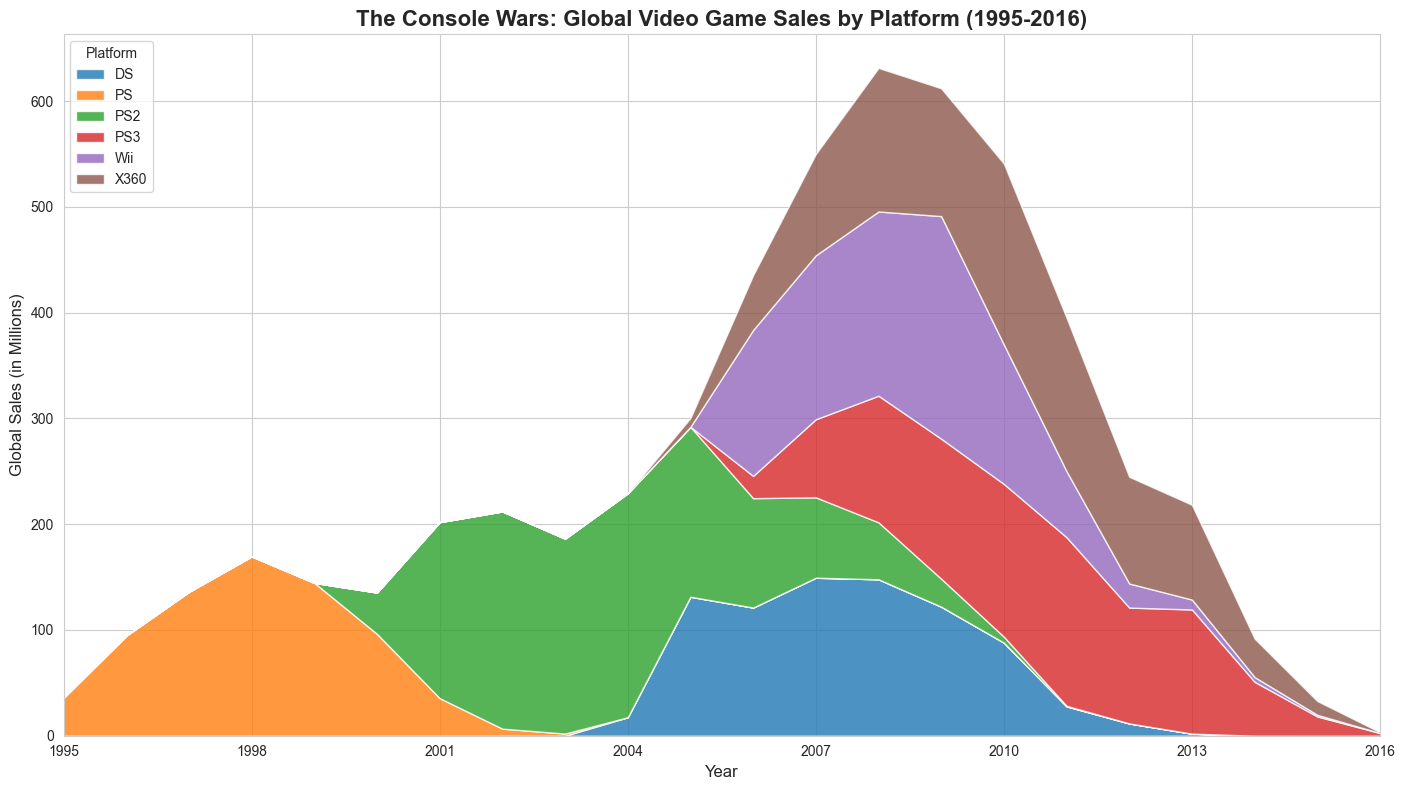

In [ ]:

# --- Data Visualization ---

sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

plt.stackplot(platform_sales.index, platform_sales.T, labels=platform_sales.columns, alpha=0.8)

plt.title('The Console Wars: Global Video Game Sales by Platform (1995-2016)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (in Millions)', fontsize=12)

plt.legend(loc='upper left', title='Platform')

plt.xlim(1995, 2016)
plt.tight_layout()

plt.savefig('console_wars_chart.png')

ax = plt.gca()  
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


plt.show()